##State-Farm-Distracted-Driver-Detection

##Dense model

##import libraries

In [1]:
import pandas as pd 
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import cv2
import os  
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

##load data  

In [2]:
from google.colab import files

files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

Saving kaggle.json to kaggle.json
ref                                                                title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
victorsoeiro/netflix-tv-shows-and-movies                           Netflix TV Shows and Movies                           2MB  2022-05-15 00:01:23          14070        408  1.0              
zusmani/petrolgas-prices-worldwide                                 Petrol/Gas Prices Worldwide                          10KB  2022-06-24 01:25:33           1547         81  1.0              
ruchi798/data-science-job-salaries                                 Data Science Job Salaries                             7KB  2022-06-15 08:59:12           2687         88  1.0              
devansodari

In [3]:
! kaggle competitions download -c state-farm-distracted-driver-detection

100% 3.99G/4.00G [00:33<00:00, 122MB/s]
100% 4.00G/4.00G [00:33<00:00, 126MB/s]


In [4]:
! unzip /content/state-farm-distracted-driver-detection.zip

Streaming output truncated to the last 5000 lines.
  inflating: imgs/train/c7/img_56636.jpg  
  inflating: imgs/train/c7/img_56661.jpg  
  inflating: imgs/train/c7/img_56699.jpg  
  inflating: imgs/train/c7/img_56717.jpg  
  inflating: imgs/train/c7/img_56724.jpg  
  inflating: imgs/train/c7/img_56768.jpg  
  inflating: imgs/train/c7/img_56779.jpg  
  inflating: imgs/train/c7/img_56849.jpg  
  inflating: imgs/train/c7/img_56899.jpg  
  inflating: imgs/train/c7/img_56938.jpg  
  inflating: imgs/train/c7/img_5706.jpg  
  inflating: imgs/train/c7/img_57076.jpg  
  inflating: imgs/train/c7/img_57122.jpg  
  inflating: imgs/train/c7/img_57137.jpg  
  inflating: imgs/train/c7/img_5715.jpg  
  inflating: imgs/train/c7/img_57278.jpg  
  inflating: imgs/train/c7/img_57321.jpg  
  inflating: imgs/train/c7/img_57345.jpg  
  inflating: imgs/train/c7/img_57355.jpg  
  inflating: imgs/train/c7/img_5741.jpg  
  inflating: imgs/train/c7/img_57433.jpg  
  inflating: imgs/train/c7/img_5753.jpg  
  infla

##Preprocessing data 

In [5]:
def preparData(path):
  imagsList = []
  labels = []
  for dic in sorted(glob.glob(os.path.join(path,'*')), key = lambda k: k.split('/')[-1]):
    for imgs in glob.glob(os.path.join(dic, '*.jpg')):
      img = cv2.imread(imgs)
      img_r = cv2.resize(img,(128,128))
      imagsList.append(img_r)
      labels.append(int(dic.split("/")[-1].replace('c','')))
 ##split data  
  X_train, X_test, y_train, y_test = train_test_split(imagsList, labels, test_size=0.2,shuffle= True, random_state = 0)
  y_train = to_categorical(y_train)
  y_test  = to_categorical(y_test)

  return np.array(X_train), np.array(X_test), y_train, y_test

In [6]:
path_train = "/content/imgs/train/"
path_test  = "/content/imgs/test/"

X_train, X_test, y_train, y_test = preparData(path_train)

#shapes of traning and testing
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape:  {X_test.shape}")
print(f"y_test shape:  {y_test.shape}")


X_train shape: (17939, 128, 128, 3)
y_train shape: (17939, 10)
X_test shape:  (4485, 128, 128, 3)
y_test shape:  (4485, 10)


##Visualize examples of data

##classes :
                c0: Safe driving 
                c1: Texting - right 
                c2: Talking on the phone - right 
                c3: Texting - left
                c4: Talking on the phone - left
                c5: Operating the radio
                c6: Drinking
                c7: Reaching behind 
                c8: Hair and makeup 
                c9: Talking to passenger

(128, 128, 3)


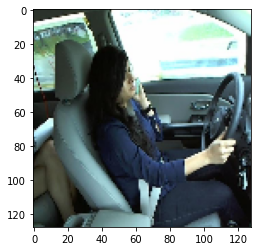

Class: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [8]:
print(X_train[402].shape)
img = X_train[402]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
print(f"Class: {y_train[402]}")

## 1- Baseline Dense layers model

In [9]:
model = models.Sequential()
model = models.Sequential()
model.add(layers.Reshape((128*128*3,), input_shape=(128,128,3,)))
model.add(layers.Dense(512, activation='relu', name='Layer_1'))
model.add(layers.Dense(512, activation='relu', name='Layer_2'))
model.add(layers.Dense(256, activation='relu', name='Layer_3'))
model.add(layers.Dense(128, activation='relu', name='Layer_5'))
model.add(layers.Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 49152)             0         
                                                                 
 Layer_1 (Dense)             (None, 512)               25166336  
                                                                 
 Layer_2 (Dense)             (None, 512)               262656    
                                                                 
 Layer_3 (Dense)             (None, 256)               131328    
                                                                 
 Layer_5 (Dense)             (None, 128)               32896     
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 25,594,506
Trainable params: 25,594,506


In [11]:
opt = tf.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer= opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train, epochs=15, batch_size=20,validation_data=(X_test, y_test))

Epoch 1/15
897/897 [==============================] - 122s 135ms/step - loss: 22.8114 - accuracy: 0.5353 - val_loss: 5.1322 - val_accuracy: 0.7126
Epoch 2/15
897/897 [==============================] - 111s 124ms/step - loss: 4.6343 - accuracy: 0.7768 - val_loss: 2.9491 - val_accuracy: 0.8268
Epoch 3/15
897/897 [==============================] - 113s 126ms/step - loss: 3.4689 - accuracy: 0.8020 - val_loss: 3.0444 - val_accuracy: 0.8163
Epoch 4/15
897/897 [==============================] - 111s 124ms/step - loss: 1.9169 - accuracy: 0.8643 - val_loss: 2.8689 - val_accuracy: 0.8154
Epoch 5/15
897/897 [==============================] - 110s 123ms/step - loss: 1.8636 - accuracy: 0.8628 - val_loss: 2.1188 - val_accuracy: 0.8348
Epoch 6/15
897/897 [==============================] - 112s 124ms/step - loss: 1.3745 - accuracy: 0.8872 - val_loss: 1.8374 - val_accuracy: 0.8783
Epoch 7/15
897/897 [==============================] - 110s 123ms/step - loss: 1.3084 - accuracy: 0.8852 - val_loss: 1.0221 

In [13]:
#train
model.evaluate(X_train,y_train)

561/561 [==============================] - 31s 56ms/step - loss: 0.0512 - accuracy: 0.9852


[0.051247529685497284, 0.9851719737052917]

In [14]:
#test
model.evaluate(X_test,y_test)

141/141 [==============================] - 8s 58ms/step - loss: 0.1484 - accuracy: 0.9672


[0.14837276935577393, 0.9672240614891052]

In [15]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


##Analysis result 

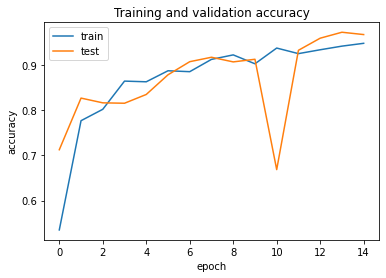

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

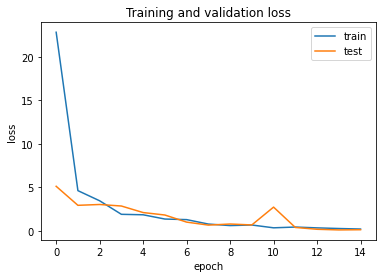

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

##save model 

In [18]:
model.save('Dense_model.h5')